# Introduction
This notebook generates the figures for the paper: Energy-based Modelling of Single Actin Filament
Polymerisation Using Bond Graphs. 

# Supporting software
## Import packages

In [1]:
## Some useful imports
import BondGraphTools as bgt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import copy

## For reimporting: use imp.reload(module)
import importlib as imp

## Stoichiometric analysis
import stoich as st

## SVG
import svgBondGraph as sbg

## Stoichiometry to BG
import stoichBondGraph as stbg

## Display (eg disp.SVG(), disp.
import IPython.display as disp

## Physical constants
import scipy.constants as const
pi = np.pi

## Cubic splines
##from scipy.interpolate import CubicSpline

quiet = False

## Plotting

# Set Plotting = True to generate PDFs in Figs/
Plotting = True

lw = 5 # linewidth
fontsize = 16
plt.rcParams.update({'font.size': fontsize})

## Numeric calculations

In [2]:
## Numeric calculations
F = const.physical_constants['Faraday constant'][0]
k_B = const.physical_constants['Boltzmann constant'][0]
R = const.physical_constants['molar gas constant'][0]
N_A = const.physical_constants['Avogadro constant'][0]
T = 273 + 37
## Sanity check
print(f'R: {R:0.6f}, k_B*N_A: {k_B*N_A:0.6f}')

## Delta from PesOdeOst93
delta = 2.7e-9 # m

## alpha and beta values are unclear.
alpha = 113
beta = 1.6
print(f'alpha: {alpha:0.2f} 1/sec')
print(f'beta: {beta:0.2f} 1/sec')

m = delta*N_A
print(f'm (standard) {m:0.2e} m/mol')

m_F = delta*N_A/F
print(f'm (Faraday-equivalent) {m_F:0.2e} m/C')

V0 = delta*(alpha-beta)
print(f'V0: {V0*1e6:0.2F} micro m /sec')

F0 =  (R*T/m)*np.log(alpha/beta)
print(f'F0: {F0*1e12:0.2F} pN')

P0 = F0*V0
print(f'P0: {P0*1e18:0.2F} aW')

gamma = np.log(alpha/beta)
print(f'gamma: {gamma:0.2F} ')

## Sanity check
print(F0 - gamma*(R*T/m))

R: 8.314463, k_B*N_A: 8.314463
alpha: 113.00 1/sec
beta: 1.60 1/sec
m (standard) 1.63e+15 m/mol
m (Faraday-equivalent) 1.69e+10 m/C
V0: 0.30 micro m /sec
F0: 6.75 pN
P0: 2.03 aW
gamma: 4.26 
0.0


In [3]:
## Numerical values from MolOst96
lamb = 1e-6 #persistance length
print(f'lambda: {lamb/1e-6} micro m')

L = 30e-9 # length used in Fig 2 
print(f'L: {L/1e-9:0.2f} nm')

chi = L*L*F0/(3*k_B*T*lamb)
print(f'chi: {chi:0.2f}')

lambda: 1.0 micro m
L: 30.00 nm
chi: 0.47


# Computational functions

In [4]:
## FF is F/F_0
## FFm is F_m/F_0
## VV is V/V_0
## VVm is Vm/V0
def normPar(alpha,beta,delta):
    V0 = delta*(alpha-beta)
    gamma = np.log(alpha/beta)
    F0 = gamma*(R*T)/m
    return F0,V0,gamma
    
def FVnorm(FF,gamma=5):
    VV = (np.exp(gamma*(1-FF)) - 1)/(np.exp(gamma)-1)
    return VV
    
def FVnormTheta(FFm,gamma=5,theta=0):    
    costh = np.cos(theta)
    VVm = costh*FVnorm(FFm*costh,gamma=gamma)
    return VVm
    
def epsilon(FFm,theta0,chi=0.47,useTan=False):
    ## chi and F Normalised by stall force F0
    sinth0 = np.sin(theta0)
    costh0 = np.cos(theta0)
    if useTan:
        eps = chi*FFm*np.tan(theta0)/(1-chi*FFm)
    else:
        eps = chi*FFm*sinth0/(1-chi*FFm*costh0)   
    return eps

def FVnormFlex(FFm,gamma=5,theta0=0,chi=0.3,normaliseTheta=False,useTan=False):
    ## F is normalised (by F0) force.
    eps = epsilon(FFm,theta0,chi=chi,useTan=useTan)
    theta = theta0 + eps
    if normaliseTheta:
        costh = np.cos(theta0)
        VVm = FVnormTheta(FFm/costh,gamma=gamma,theta=theta)/costh
    else:
        VVm = FVnormTheta(FFm,gamma=gamma,theta=theta)
    return VVm,eps
    

In [5]:
## Optional plotting
lw = 5 # linewidth
def Savefig(name):
    if Plotting:
        plt.rcParams.update({'font.size': fontsize})
        plt.tight_layout()
        plotname = 'Figs/'+name+'.pdf'
        print('Saving',plotname)
        plt.savefig(plotname)

In [6]:
## Editing function (to change TF modulus)
def modulus(sys,moduli={}):
    q = "'"
    compNames = moduli.keys()
    filename = sys+'.py'
    newfilename = sys+'_mod.py'
    text = open(filename, 'r')
    f = open(newfilename,'w')
    for line in text.readlines():
        match = False
        for name in compNames:
            Name = q+name+q
            if Name in line:
#                 print(name)
#                 print(line)
#                 print(line.parRename(Name,q+moduli[name]+q))
                f.write(line.parRename(Name,q+moduli[name]+q))
                match = True
        if not match:
            f.write(line)
 
modulus('ActinRodTheta_abg',moduli={'m_m':'m','m_cos':'cos(theta)'})

# Case 1: Rigid filament normal to membrane

## Bond graph model
At the moment:
- this is not used in the computations.
- experimental rewriting of parameters is used.

TF m
{'m_m': 'M'}
m_m
Replacing 'm_m' with 'M'


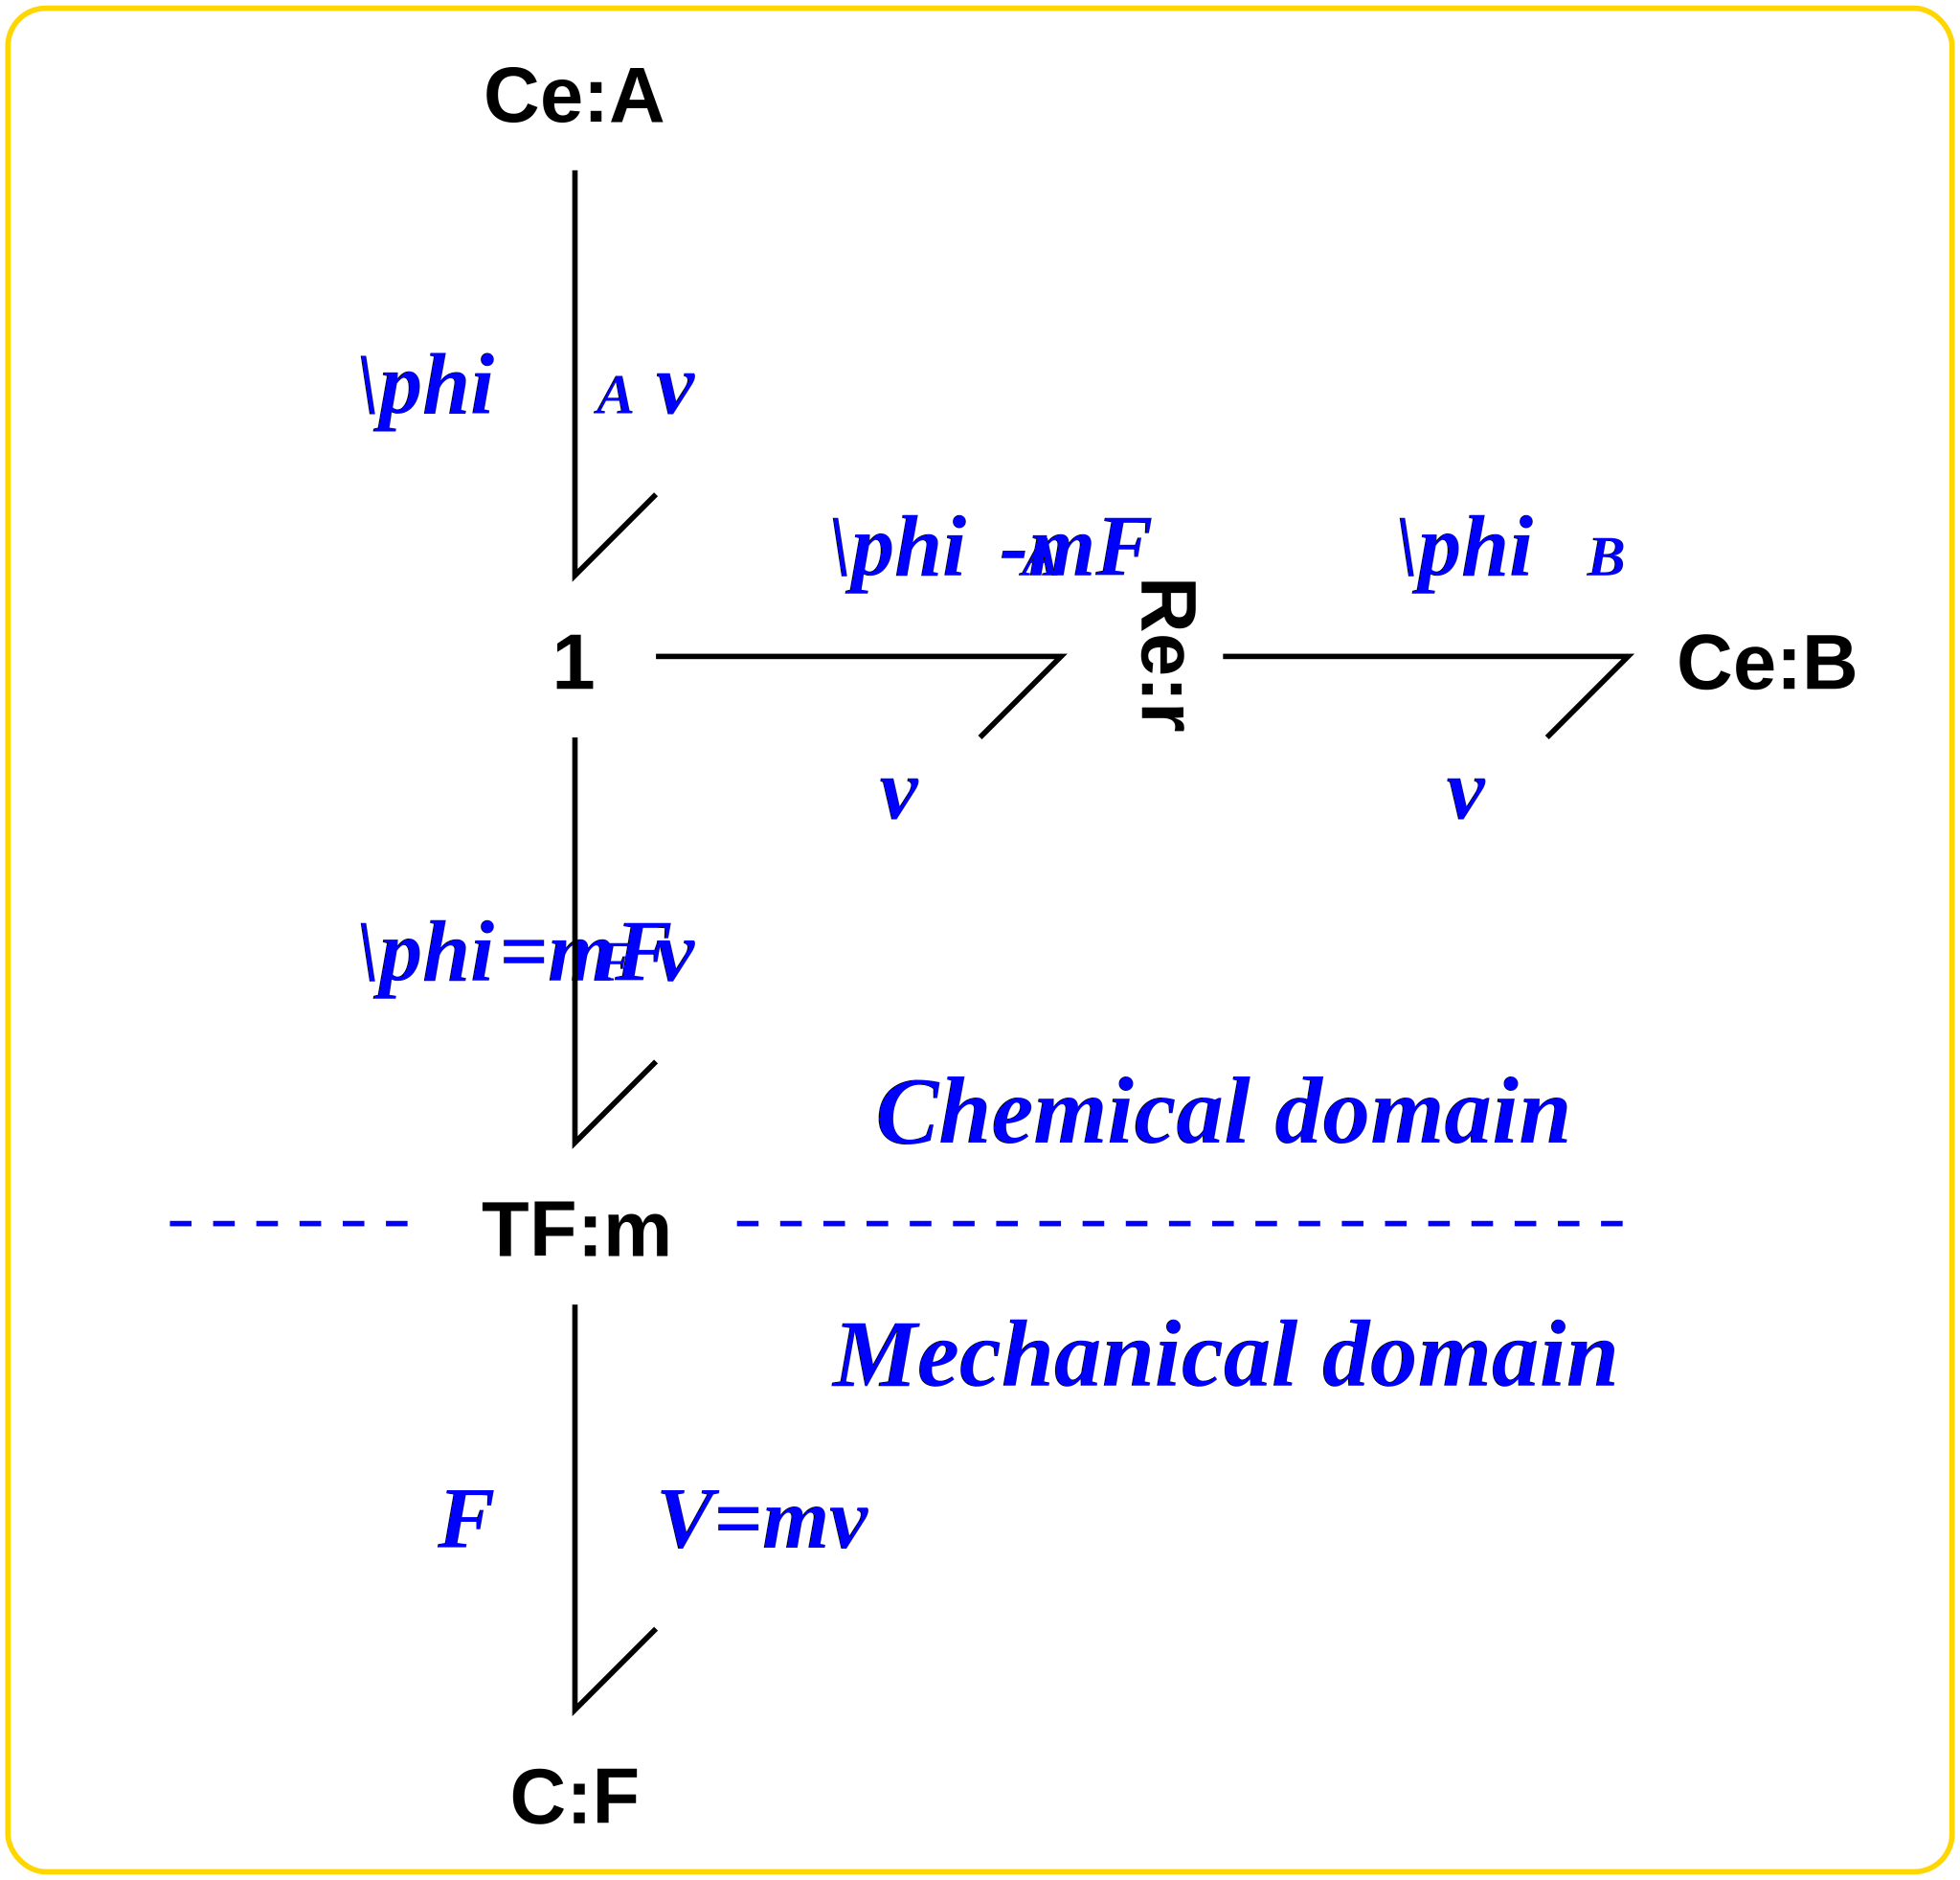

In [7]:
## Set up simple model 
## NB BGT defines the modulusin terms of effort, so use M = 1/m here.
imp.reload(sbg)
sbg.model('ActinRod_abg.svg',parRename={'m_m':'M'})
import ActinRod_abg
imp.reload(ActinRod_abg)
disp.SVG('ActinRod_abg.svg')

In [8]:
imp.reload(ActinRod_abg)
model=ActinRod_abg.model()
model.constitutive_relations

[-K_A*kappa_r*x_1*exp(-x_0/(F*M*RT))/M + K_B*kappa_r*x_2/M + dx_0,
 K_A*kappa_r*x_1*exp(-x_0/(F*M*RT)) - K_B*kappa_r*x_2 + dx_1,
 -K_A*kappa_r*x_1*exp(-x_0/(F*M*RT)) + K_B*kappa_r*x_2 + dx_2]

## Stoichiometry

In [9]:
## Stoichiometry
s = st.stoich(ActinRod_abg.model(),linear=['F'],symbolic=True,quiet=quiet)

Computing N ...
Swapping Re:r for two Sf in ActinRod
Done.
Computing K ...
Done.
Computing G ...
Done.


In [10]:
st.sprint(s,'species')
st.sprint(s,'N')
st.sprint(s,'Nf')
st.sprint(s,'Nr')#
st.sprint(s,'Z')
st.sprint(s,'D')

species:
 ['F', 'A', 'B']
N:
 Matrix([[1/M], [-1], [1]])
Nf:
 Matrix([[-1/M], [1], [0]])
Nr:
 Matrix([[0], [0], [1]])
Z:
 [[-1/M 0]
 [1 0]
 [0 1]]
D:
 [[-1]
 [ 1]]


In [11]:
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

## Plot velocity-force curve.

Saving Figs/FV0.pdf


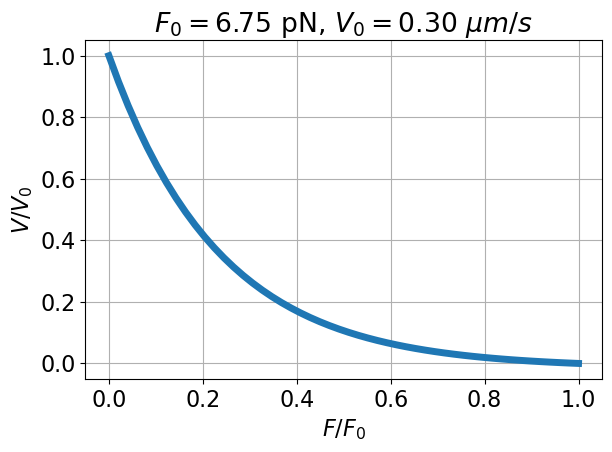

In [12]:
## Plot curve: V-F
FF = np.linspace(0,1)
VV = delta*( alpha*np.exp(-gamma*FF) -beta )/V0
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$')
plt.plot(FF,VV,lw=lw)
plt.xlabel('$F/F_0$')
plt.ylabel('$V/V_0$')
plt.grid()
Savefig('FV0')

Saving Figs/FV0.pdf


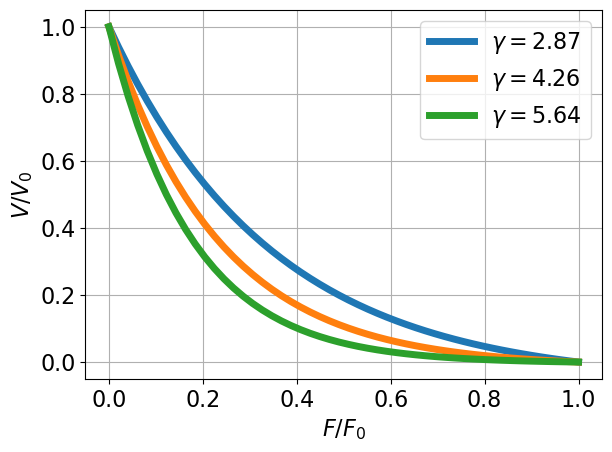

In [13]:
## Plot normalised curve: V-F for various gamma
FF = np.linspace(0,1)
# Alpha = np.array([np.exp(3)*beta,alpha,np.exp(5)*beta])
Alpha = np.array([0.25,1,4])*alpha
# print(Alpha)
for alp in Alpha:
    F00,V00,gam = normPar(alp,beta,delta)
    label = f'$\\gamma = {gam:0.2f}$'
    VV = FVnorm(FF,gamma=gam)
    plt.plot(FF,VV,lw=lw,label=label)
    
# plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$') 
plt.xlabel('$F/F_0$')
plt.ylabel('$V/V_0$')
plt.grid()
plt.legend()
Savefig('FV0')

Saving Figs/FV.pdf


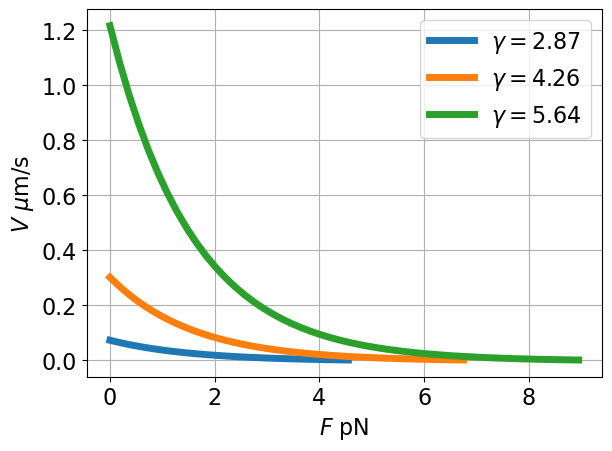

In [14]:
## Plot unnormalised curve: V-F for various gamma
# print(Alpha)
# Alpha = [alpha]
for alp in Alpha:
    F0,V0,gam = normPar(alp,beta,delta)
    label = f'$\\gamma = {gam:0.2f}$' #', F_0 = {F0/1e-12:.2f}pN, V_0={V0/1e-6:.2f}\mu m/s$'
    VV = FVnorm(FF,gamma=gam)
    plt.plot(FF*F0/1e-12,VV*V0/1e-6,lw=lw,label=label)
    
# plt.title(f'$F_0 = {F0*plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$')    1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$')  
plt.xlabel('$F$ pN')
plt.ylabel('$V~\mu$m/s')
plt.grid()
plt.legend()
Savefig('FV')

## Plot mechanical power: $VF$

In [15]:
## Redo for standard values
F0,V0,gamma = normPar(alpha,beta,delta)
VV = FVnorm(FF,gamma=gamma)

Saving Figs/FP_mech.pdf


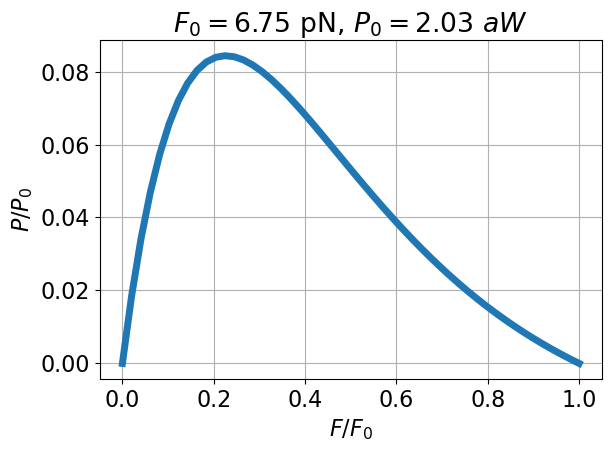

In [16]:
## Plot mechanical power
PP = FF*VV
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $P_0 = {P0*1e18:0.2f}~aW$')
plt.plot(FF,PP,lw=lw)
plt.xlabel('$F/F_0$')
plt.ylabel('$P/P_0$')
plt.grid()
Savefig('FP_mech')

## Plot chemical power : $v(\phi_A-\phi_B)$ and mechanical power

Phi: 10973.337125073138
Saving Figs/FP.pdf


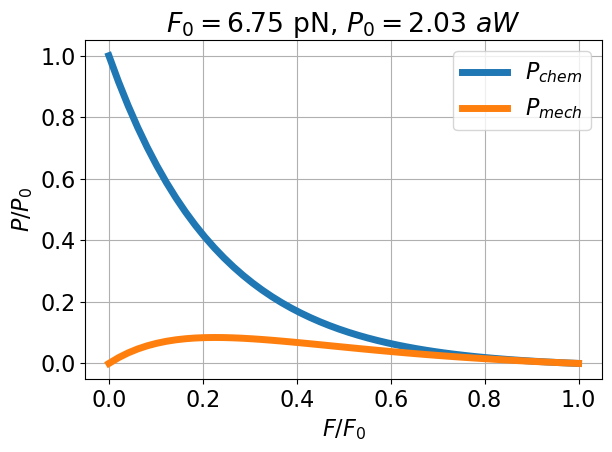

In [17]:
## Plot chemical power v(phi_A-phi_B)
v = V0*VV/m #chemical flow
Phi = R*T*gamma
print(f'Phi: {Phi}')
PP_chem = Phi*v/P0 ## Normalised

Phi_Re = Phi-m*FF*F0
PP_Re = Phi_Re*v/P0

plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $P_0 = {P0*1e18:0.2f}~aW$')
plt.plot(FF,PP_chem,lw=lw,label='$P_{chem}$')
# plt.plot(FF,PP_Re,lw=lw,label='$P_{Re}$')
plt.plot(FF,PP,lw=lw,label='$P_{mech}$')
plt.legend()
plt.xlabel('$F/F_0$')
plt.ylabel('$P/P_0$')
plt.grid()
Savefig('FP')

Saving Figs/VP.pdf


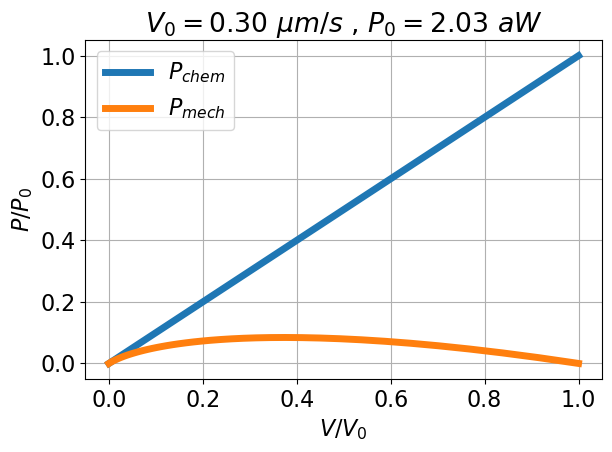

In [18]:
## Redo plotted against V
plt.title(f'$V_0 = {V0*1e6:0.2f}~\mu m/s$ , $P_0 = {P0*1e18:0.2f}~aW$')
plt.plot(VV,PP_chem,lw=lw,label='$P_{chem}$')
# plt.plot(VV,PP_Re,lw=lw,label='$P_{Re}$')
plt.plot(VV,PP,lw=lw,label='$P_{mech}$')
plt.legend()
plt.xlabel('$V/V_0$')
plt.ylabel('$P/P_0$')
plt.grid()
Savefig('VP')

## Plot efficiency.

/tmp/ipykernel_13247/172306959.py:2: RuntimeWarning: invalid value encountered in divide
  eta = PP/PP_chem


Saving Figs/Feta.pdf


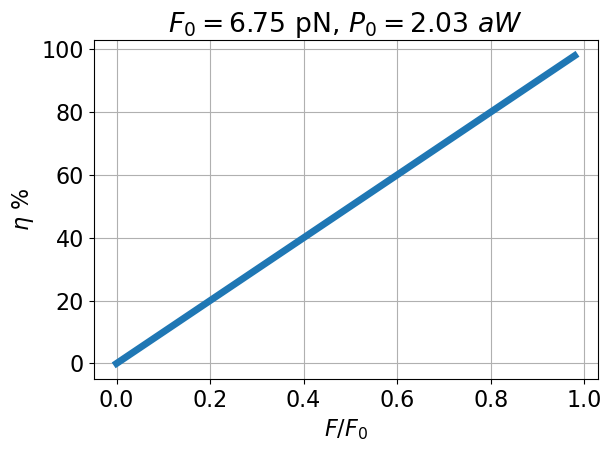

In [19]:
## Efficiency (??)
eta = PP/PP_chem
plt.plot(FF,eta*100,lw=lw)
plt.xlabel('$F/F_0$')
plt.ylabel('$\eta$ %')
plt.grid()
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $P_0 = {P0*1e18:0.2f}~aW$')
Savefig('Feta')

Saving Figs/Veta.pdf


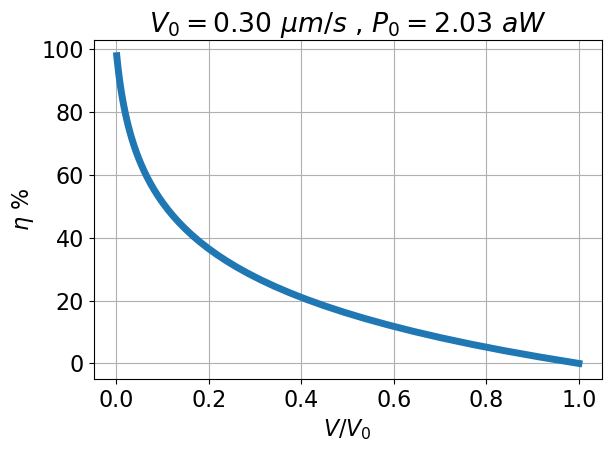

In [20]:
## Redo plotted against V
plt.plot(VV,eta*100,lw=lw)
plt.xlabel('$V/V_0$')
plt.ylabel('$\eta$ %')
plt.grid()
plt.title(f'$V_0 = {V0*1e6:0.2f}~\mu m/s$ , $P_0 = {P0*1e18:0.2f}~aW$')
Savefig('Veta')

# Case 2a: Rigid filament at angle $\theta$ from normal to membrane

## Bond graph model
At the moment:
- this is not used in the computations.
- experimental rewirting of parameters is used.

TF c
TF m
{'m_m': 'm', 'm_c': 'c'}
m_m
Replacing 'm_m' with 'm'
m_c
Replacing 'm_c' with 'c'


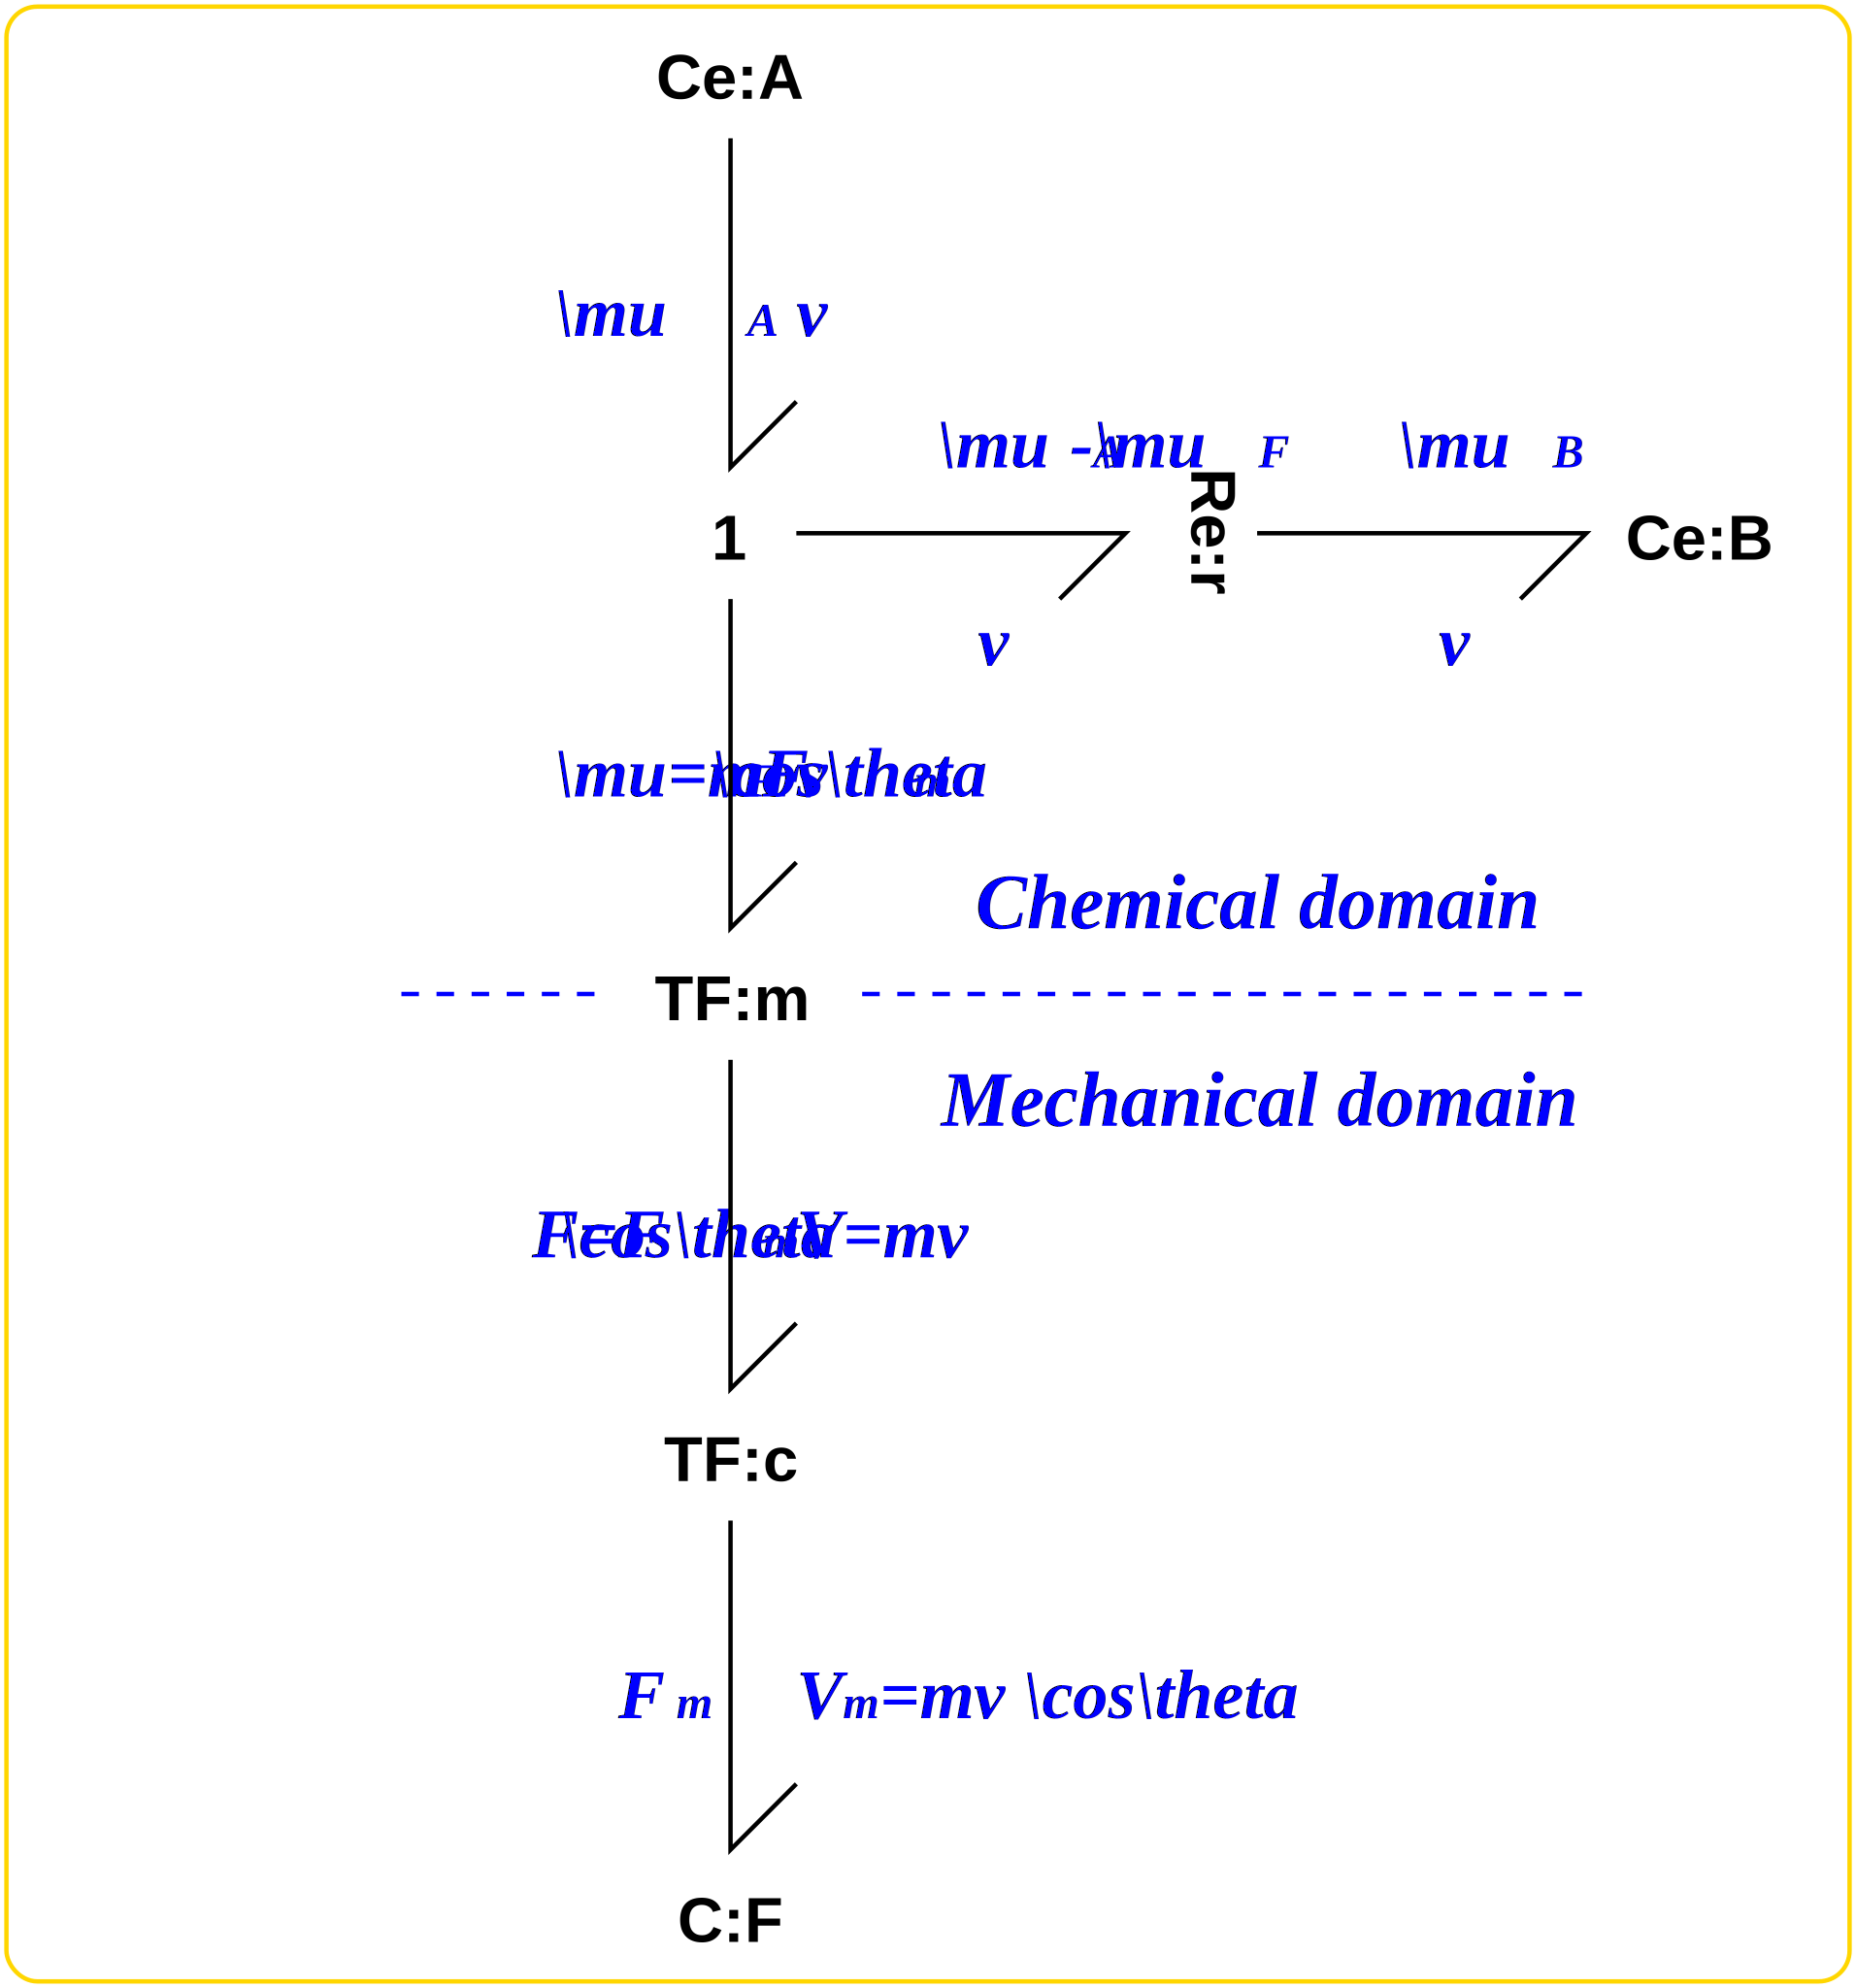

In [21]:
## Set up simple model
imp.reload(sbg)
sbg.model('ActinRodTheta_abg.svg',parRename={'m_m':'m', 'm_c':'c'})
import ActinRodTheta_abg
imp.reload(ActinRodTheta_abg)
disp.SVG('ActinRodTheta_abg.svg')

In [22]:
# ## Reset TF moduli
# modulus('ActinRodTheta_abg',moduli={'m_m':'m', 'm_c':'c'})
# import ActinRodTheta_abg_mod

In [23]:
imp.reload(ActinRodTheta_abg)
model=ActinRodTheta_abg.model()
model.constitutive_relations

[-K_A*kappa_r*x_1*exp(-x_0/(F*RT*c*m))/(c*m) + K_B*kappa_r*x_2/(c*m) + dx_0,
 K_A*kappa_r*x_1*exp(-x_0/(F*RT*c*m)) - K_B*kappa_r*x_2 + dx_1,
 -K_A*kappa_r*x_1*exp(-x_0/(F*RT*c*m)) + K_B*kappa_r*x_2 + dx_2]

## Stoichiometry

In [24]:
## Stoichiometry
s = st.stoich(ActinRodTheta_abg.model(),linear=['F'],symbolic=True,quiet=quiet)

Computing N ...
Swapping Re:r for two Sf in ActinRodTheta
Done.
Computing K ...
Done.
Computing G ...
Done.


In [25]:
st.sprint(s,'species')
st.sprint(s,'N')
st.sprint(s,'Nf')
st.sprint(s,'Nr')#
st.sprint(s,'Z')
st.sprint(s,'D')

species:
 ['F', 'A', 'B']
N:
 Matrix([[1/(c*m)], [-1], [1]])
Nf:
 Matrix([[-1/(c*m)], [1], [0]])
Nr:
 Matrix([[0], [0], [1]])
Z:
 [[-1/(c*m) 0]
 [1 0]
 [0 1]]
D:
 [[-1]
 [ 1]]


In [26]:
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

In [27]:
disp.Latex(st.sprintl(s,'N'))

<IPython.core.display.Latex object>

In [28]:
#disp.SVG('ActinRodTheta_abg.svg')

## Optimal angle (for max velocity)

In [29]:
def optTheta(VV,Theta):
    
    V_max = np.max(VV)
#     print(V_max)
    for i,V in enumerate(VV):
        if V == V_max:
#             print(i,V)
            opt = Theta[i]
    
    return V_max,opt
    

## Plot velocity-theta curves.

Saving Figs/ThetaV_theta.pdf


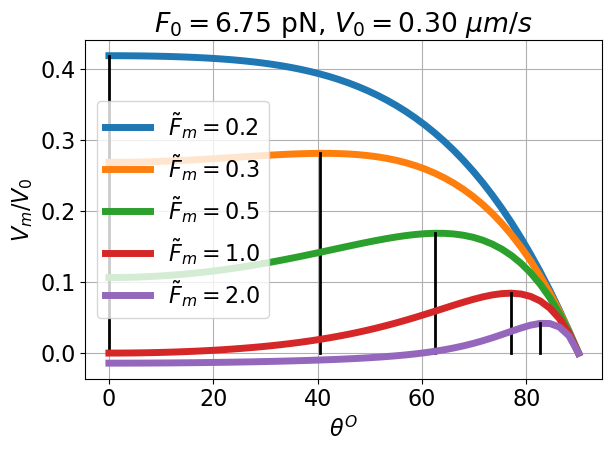

In [30]:
## Incidence angle theta - stiff filament
## Plot curve V - theta
#FF = F0*np.linspace(0,1)
FFF = np.array([0.2,0.3,0.5,1,2])
Theta = (np.pi/2)*np.linspace(0,1)
Opt = []
for FF in FFF:
    VV = FVnormTheta(FF,gamma=gamma,theta=Theta)
    
    label = f'$\\tilde F_m={FF:0.1f}$'
    plt.plot(Theta*(180/np.pi),VV,lw=lw,label=label)
    
    ## Optimum angle
    V_max,opt = optTheta(VV,Theta)
    Opt.append(opt)
    XX = np.array([opt,opt])*180/np.pi
    YY = np.array([0,V_max])
#     print(XX,YY)
    plt.plot(XX,YY,lw=2,color='black')
Opt = np.array(Opt)

## Save for later
Opt0 = Opt
FFF0 = FFF

plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$')    
plt.xlabel('$\\theta^O$')
plt.ylabel('$V_m/V_0$')
plt.grid()
plt.legend()
Savefig('ThetaV_theta')

## Plot optimal angle $\theta_{opt}$.

Saving Figs/ThetaOpt_theta.pdf


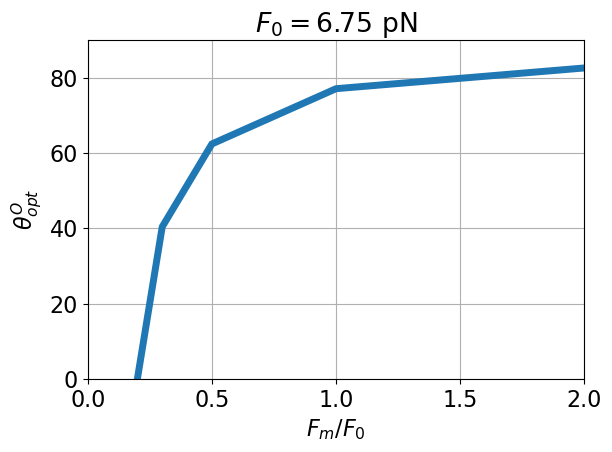

In [31]:
## Plot Theta_opt
plt.plot(FFF,Opt*180/pi,lw=lw)
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN')    
plt.ylabel('$\\theta_{opt}^O$')
plt.xlabel('$F_m/F_0$')
plt.grid()
plt.ylim(0,90)
plt.xlim(0,max(FFF))
Savefig('ThetaOpt_theta')

## Plot effective stall force $F_s$.

Saving Figs/ThetaFs_theta.pdf


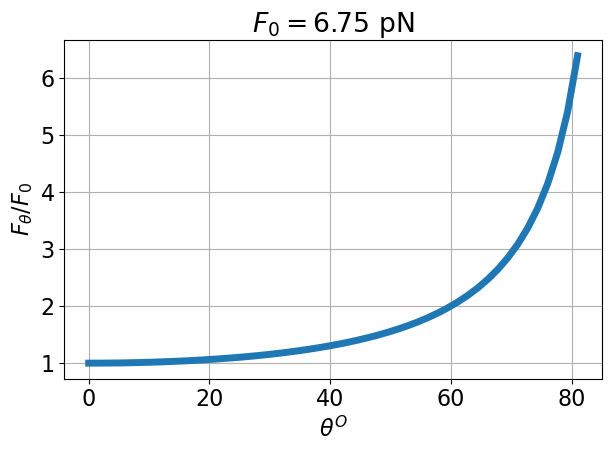

In [32]:
## Effective stall force
Theta = (np.pi/2)*np.linspace(0,0.9)
plt.plot(Theta*(180/np.pi), 1/np.cos(Theta),lw=lw)
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN')    
plt.xlabel('$\\theta^O$')
plt.ylabel('$F_\\theta/F_0$')
plt.grid()
# plt.legend()
Savefig('ThetaFs_theta')

## Plot velocity-force curve.

Saving Figs/FV_theta.pdf


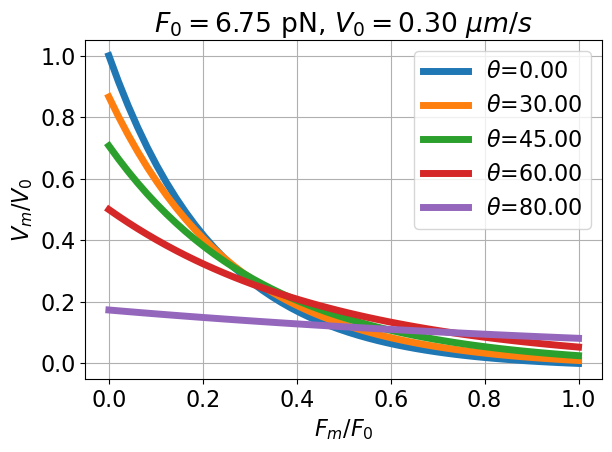

In [33]:
## Incidence angle theta - stiff filament
## Plot curve V - F 
usingFs = False

    
Theta = np.array([0,30,45,60,80])*pi/180
for theta in Theta:
    label = f'$\\theta$={theta*180/pi:0.2f}'
    if usingFs:
        FF = np.linspace(0,1/costh)
    else:
        FF = np.linspace(0,1)

    VV = FVnormTheta(FF,gamma=gamma,theta=theta)
    if usingFs:
        plt.plot(FF*costh,VV,lw=lw,label=label)
    else:
        plt.plot(FF,VV,lw=lw,label=label)

if usingFs:
    xlabel = '$F/F_s$'
else:
    xlabel = '$F_m/F_0$'
plt.xlabel(xlabel)
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$')  
plt.ylabel('$V_m/V_0$')
plt.grid()
plt.legend()
Savefig('FV_theta')

## Plot velocity-force-angle surface.

Saving Figs/surf.pdf


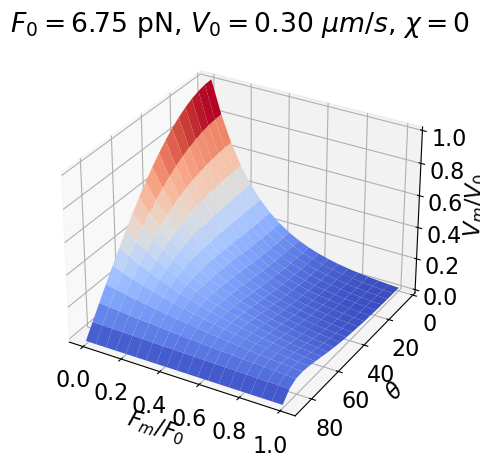

In [34]:
## 3D plot.
from matplotlib import cm
FF = np.linspace(0,1,20)
Theta = (np.pi/2)*np.linspace(0,1,20)
FF,Theta = np.meshgrid(FF,Theta)
# costh = np.cos(Theta)
# VV = delta*costh*(alpha*np.exp(-gamma*FF*costh) -beta )/V0
# VV = FVnorm(FF*costh,gamma=gamma)*costh
VV = FVnormTheta(FF,gamma=gamma,theta=Theta)
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(FF, Theta*180/pi, VV, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.set_xlabel('$F_m/F_0$')
ax.set_ylabel(r'$\theta$')
ax.set_zlabel(r'$V_m/V_0$')
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\chi = 0$') 
plt.ylim(90,0)

Savefig('surf')

# elev = 0
# azim = 0
# roll = 0
# ax.view_init(elev, azim, roll)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.zlabel('$V/V_0$')

# Case 2b: Flexible filament at angle $\theta$ from normal to membrane


## Bond graph model
At the moment:
- this is not used in the computations.
- experimental rewirting of parameters is used.

Creating subsystem: MTF:c
TF m
{'m_m': 'm', 'm_cos': 'cos(theta_0+eps)', 'm_Lsin': 'Lsin(theta_0)'}
m_m
Replacing 'm_m' with 'm'
m_cos
Replacing 'm_cos' with 'cos(theta_0+eps)'
m_Lsin
Replacing 'm_Lsin' with 'Lsin(theta_0)'


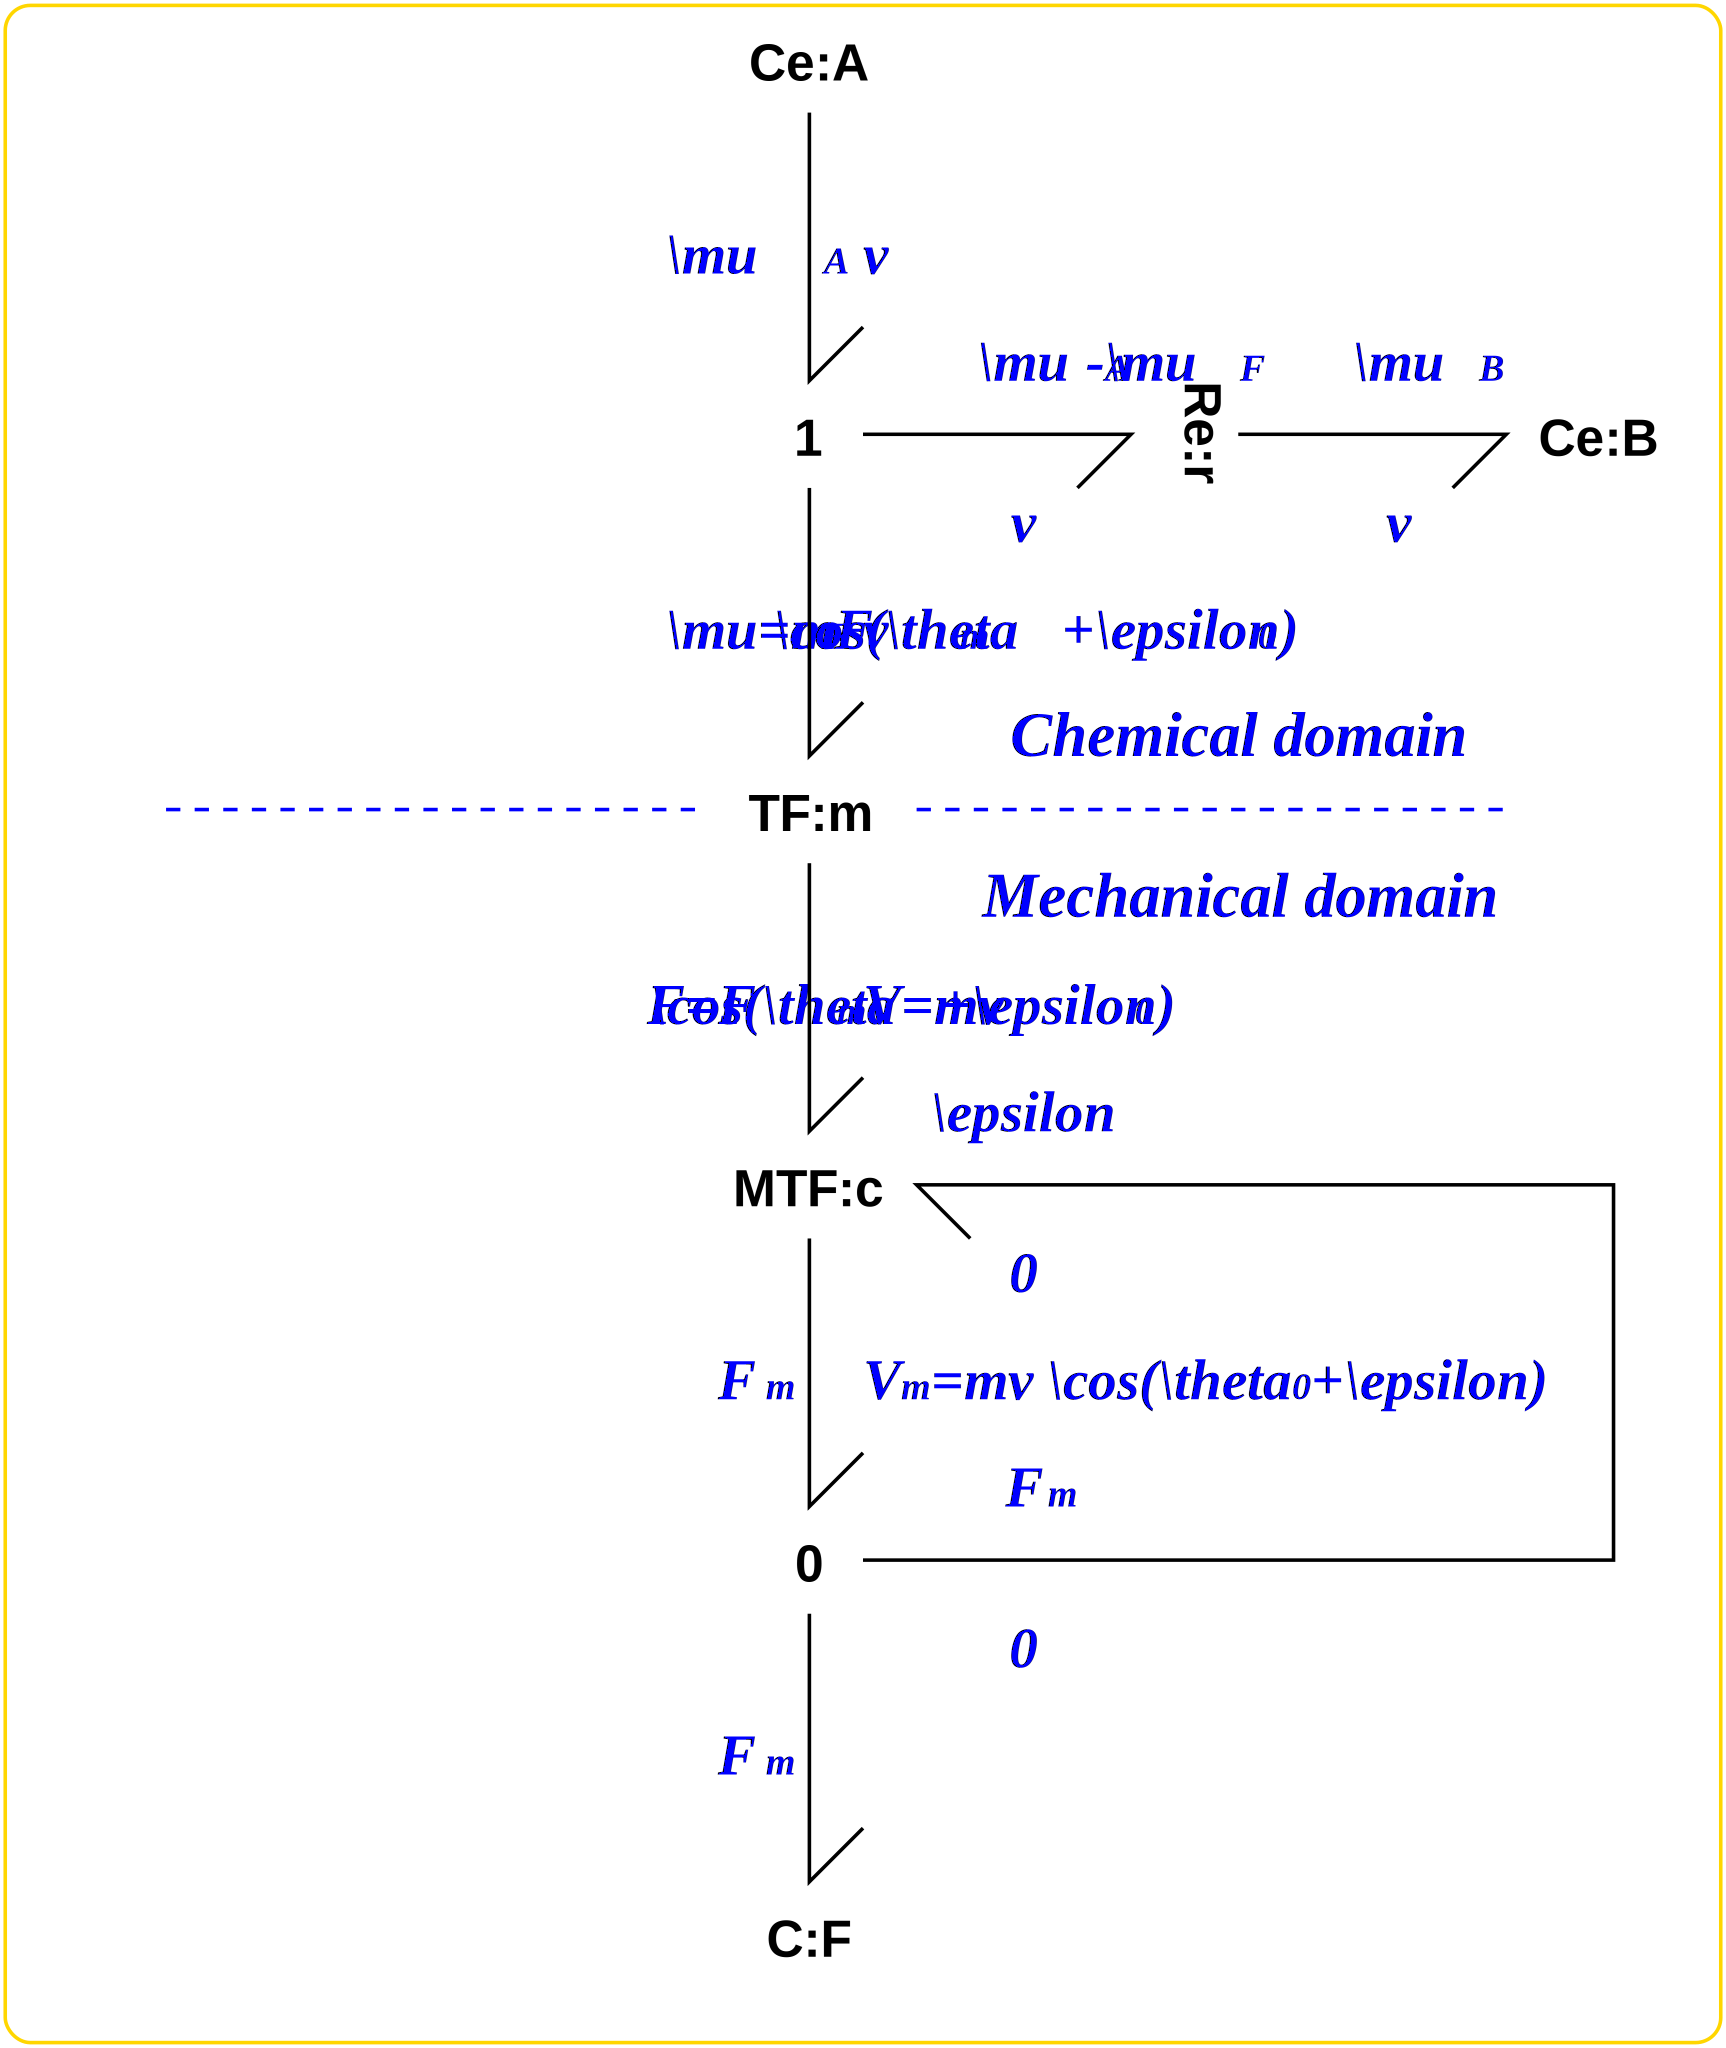

In [35]:
## Set up simple model
parRename = {'m_m':'m', 'm_cos':'cos(theta_0+eps)'}
parRename['m_Lsin'] = 'Lsin(theta_0)'
sbg.model('ActinRodThetaFlex_abg.svg',parRename=parRename)
import ActinRodThetaFlex_abg
imp.reload(ActinRodThetaFlex_abg)
disp.SVG('ActinRodThetaFlex_abg.svg')

In [37]:
imp.reload(ActinRodThetaFlex_abg)
# model=ActinRodThetaFlex_abg.model()
# print(model.constitutive_relations)
# print(len(model.constitutive_relations))

# for i,cr in enumerate(model.constitutive_relations):
#     print(i,cr)

# print(model.state_vars)

<module 'ActinRodThetaFlex_abg' from '/home/peterg/WORK/Research/SystemsBiology/Notes/2024/ActinRod/ActinRodThetaFlex_abg.py'>

## Stoichiometry

In [38]:
# ## Stoichiometry
# imp.reload(st)
# imp.reload(ActinRodThetaFlex_abg)
# s = st.stoich(ActinRodThetaFlex_abg.model(),linear=['c','eps','r_f'],symbolic=True,quiet=quiet)

In [40]:
# st.sprint(s,'species')
# st.sprint(s,'N')
# st.sprint(s,'Nf')
# st.sprint(s,'Nr')#
# st.sprint(s,'Z')
# st.sprint(s,'D')

In [41]:
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

## Parameters

In [42]:
## Flexible rod: spring at root
# chi = 0.3 # Compliance * length *F0
useTan = False
# print(f'cl = {chi} rad = {chi*180/pi:.1f} deg')

## Compute deviation angle $\epsilon=\theta-\theta_0$

## Plot velocity-angle curves.

Saving Figs/ThetaV_flex.pdf


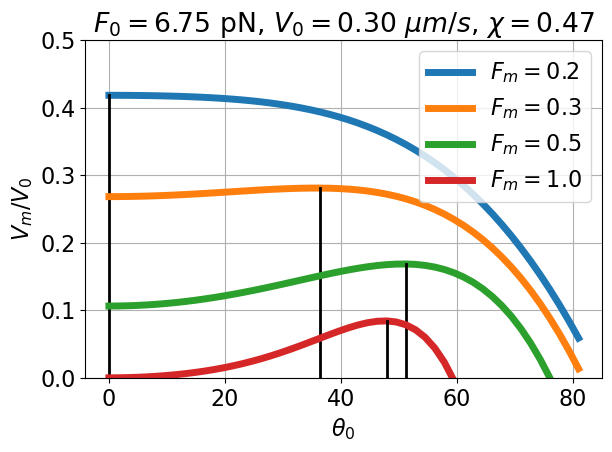

In [43]:
## Incidence angle theta - flexible filament
## Plot curve V - theta
#FF = F0*np.linspace(0,1)
FFF = np.array([0.2,0.3,0.5,1])
Theta0 = (np.pi/2)*np.linspace(0,0.9)
Opt = []
Eps = {}
Err = {}
for FF in FFF:
#     label = f'{F0*ff*1e12:0.2f} pN'
    label = f'$F_m=${FF:0.1f}'
#     costh0 = np.cos(Theta0)
#     sinth0 = np.sin(Theta0)
#     eps = chi*FF*sinth0/(1-chi*FF*costh0)
#     eps = epsilon(FF,Theta0,chi=chi,useTan=useTan)
    
    VV,eps =  FVnormFlex(FF,gamma=gamma,theta0=Theta0,chi=chi,useTan=useTan)
    
    Eps[FF] = eps
#     Theta = Theta0 + eps
#     costh = np.cos(Theta)
    
    ## Sanity check
    err = eps - chi*FF*np.sin(Theta0+eps)
    Err[FF] = err
    
#     VV = delta*costh*( alpha*np.exp((-m/(R*T))*FF*costh) -beta )
#     VV = delta*costh*(alpha*np.exp(-gamma*FF*costh) -beta )/V0
#     VV = FVnorm(FF*costh,gamma=gamma)*costh
    
 
    plt.plot(Theta0*(180/np.pi),VV,lw=lw,label=label)
    
    ## Optimum angle
    V_max,opt = optTheta(VV,Theta0)
    Opt.append(opt)
    XX = np.array([opt,opt])*180/np.pi
    YY = np.array([0,V_max])
#     print(XX,YY)
    plt.plot(XX,YY,lw=2,color='black')
Opt = np.array(Opt)    
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\chi = {chi:0.2f}$')    
plt.xlabel('$\\theta_0$')
plt.ylabel('$V_m/V_0$')
plt.grid()
plt.legend()
plt.ylim(bottom=0,top=0.5)
Savefig('ThetaV_flex')

## Plot deviation angle-angle ($\epsilon$ -- $\theta_0$) curves.

Saving Figs/eps_flex.pdf


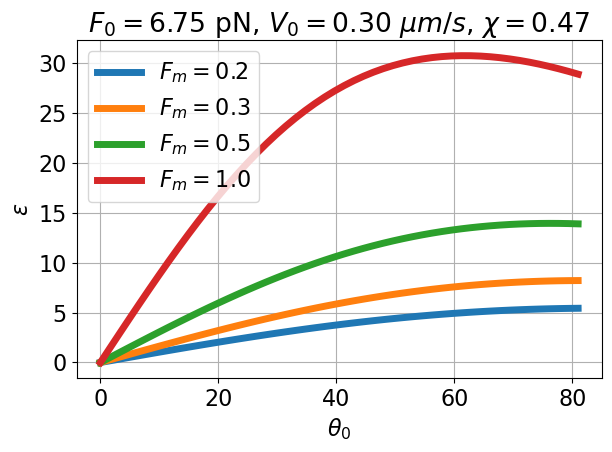

In [44]:
## PLot Epsilon = Theta-Theta0
for FF in Eps.keys():
    label = f'$F_m=${FF:0.1f}'
    plt.plot(Theta0*(180/np.pi),Eps[FF]*180/pi,lw=lw,label=label)
    
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\chi = {chi:0.2f}$')    
plt.xlabel('$\\theta_0$')
plt.ylabel('$\epsilon$')
plt.grid()
plt.legend()
Savefig('eps_flex')

## Plot $\epsilon$ error

Saving Figs/err_flex.pdf


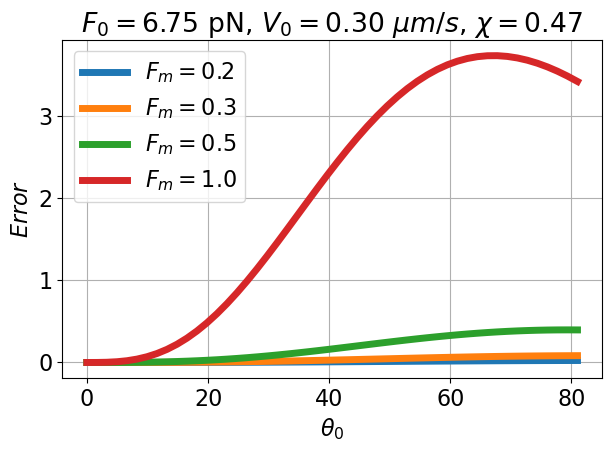

In [45]:
## Plot Epsilon error
for FF in Err.keys():
    label = f'$F_m=${FF:0.1f}'
    plt.plot(Theta0*(180/np.pi),Err[FF]*180/pi,lw=lw,label=label)
    
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\chi = {chi:0.2f}$')    
plt.xlabel('$\\theta_0$')
plt.ylabel('$Error$')
plt.grid()
plt.legend()
Savefig('err_flex')

## Plot optimal angle $\theta_{opt}$.

Saving Figs/ThetaOpt_flex.pdf


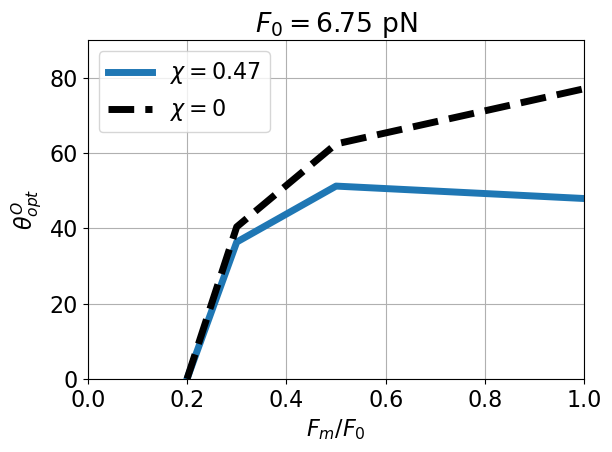

In [46]:
## Plot Theta_opt
plt.plot(FFF,Opt*180/pi,lw=lw,label=f'$\\chi = {chi:0.2f}$')
plt.plot(FFF0,Opt0*180/pi,lw=lw,ls='dashed',color='black',label='$\\chi=0$')
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN')    
plt.ylabel('$\\theta_{opt}^O$')
plt.xlabel('$F_m/F_0$')
plt.grid()
plt.ylim(0,90)
plt.xlim(0,max(FFF))
plt.legend()
Savefig('ThetaOpt_flex')

## Plot velocity-force curves - vary theta

Saving Figs/FV_flex.pdf


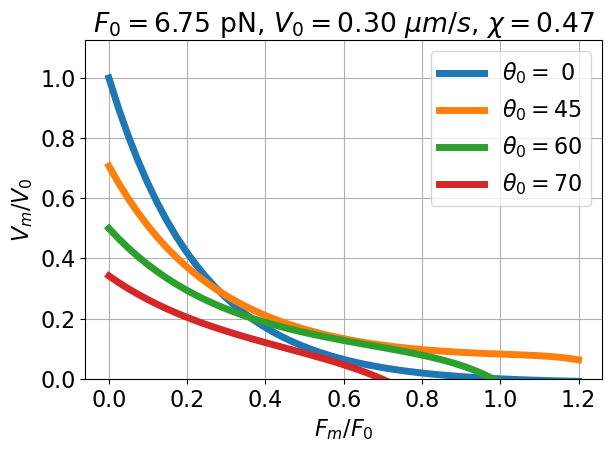

In [47]:
## Incidence angle theta - flexible filament
## Plot curve V - F

usingFs=False

THETA0 = np.array([0,45,60,70])*pi/180
Opt = []
Eps = {}
Err = {}


for Theta0 in THETA0:
    label = f'$\\theta_0=${Theta0*(180/pi):2.0f}'
    costh0 = np.cos(Theta0)
    sinth0 = np.sin(Theta0)
    F_crit = 1/(chi*costh0)
#     print(F_crit)
    if usingFs:
        FF = np.linspace(0,1/costh0)
    else:
        FF = np.linspace(0,1.2)

    VV,eps =  FVnormFlex(FF,gamma=gamma,theta0=Theta0,chi=chi,useTan=useTan)
    
    ## Sanity check
    err = eps - chi*FF*np.sin(Theta0+eps)
 
    if usingFs:
        plt.plot(FF*costh0,VV,lw=lw,label=label)
    else:
        plt.plot(FF,VV,lw=lw,label=label)
 
    
if usingFs:
    xlabel = '$F_m/F_s$'
else:
    xlabel = '$F_m/F_0$'
plt.xlabel(xlabel)
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\\chi={chi:0.2f}$')    
plt.ylabel('$V_m/V_0$')
plt.grid()
plt.legend()
plt.ylim(bottom=0)
Savefig('FV_flex')

## Plot velocity-force curves - vary chi

/tmp/ipykernel_13247/4207970462.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  F_crit = 1/(ch*costh0)


Saving Figs/FVchi_flex.pdf


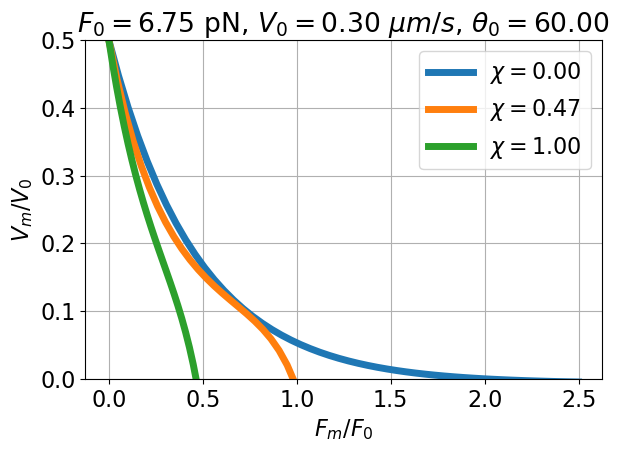

In [48]:
## Incidence angle theta - flexible filament
## Plot curve V - F

usingFs=False

Chi = np.array([0,chi,1])

Eps = {}
Err = {}
FFF = {}

Theta0= pi/3
# Theta0 = pi/6

for ch in Chi:

    costh0 = np.cos(Theta0)
    sinth0 = np.sin(Theta0)
    F_crit = 1/(ch*costh0)
#     print(chi,costh0,F_crit)
#     if usingFs:
#         FF = np.linspace(0,1/costh0)
#     else:
#         FF = np.linspace(0,2)

    maxFF = min(2.5,0.5*F_crit)
#     print(maxFF)
    FF = np.linspace(0,maxFF)
    VV,eps =  FVnormFlex(FF,gamma=gamma,theta0=Theta0,chi=ch,useTan=useTan)
    
    ## Sanity check
    err = eps - ch*FF*np.sin(Theta0+eps)
    
    Eps[ch] = eps
    Err[ch] = err
    FFF[ch] = FF
    
    label = f'$\\chi={ch:.2f}$'
#     label += f' ({F_crit:0.1f})'
# 
 
    if usingFs:
        plt.plot(FF*costh0,VV,lw=lw,label=label)
    else:
        plt.plot(FF,VV,lw=lw,label=label)

#     plt.plot(FF,eps*180/pi,lw=lw,label=label)
if usingFs:
    xlabel = '$F_m/F_\\theta$'
else:
    xlabel = '$F_m/F_0$'
plt.xlabel(xlabel)
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\\theta_0={Theta0*180/pi:0.2f}$')    
plt.ylabel('$V_m/V_0$')
plt.grid()
plt.legend()
plt.ylim(bottom=0,top=max(VV))
Savefig('FVchi_flex')

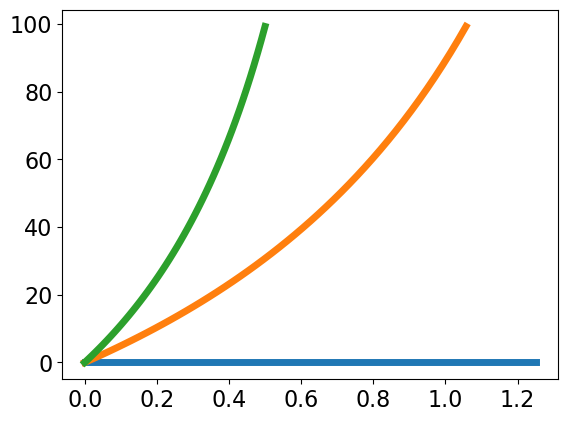

In [49]:
## Plot eps.
for ch in Eps.keys():
    plt.plot(FFF[ch]*costh0,Eps[ch]*180/pi,lw=lw)

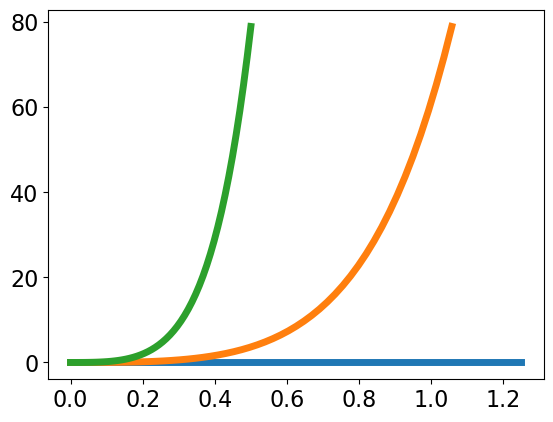

In [50]:
## Plot error
for ch in Eps.keys():
    plt.plot(FFF[ch]*costh0,Err[ch]*180/pi,lw=lw)
 

In [51]:
print(chi)

0.4730426877097931


## Plot velocity-force-angle surface.

Saving Figs/surf_flex.pdf


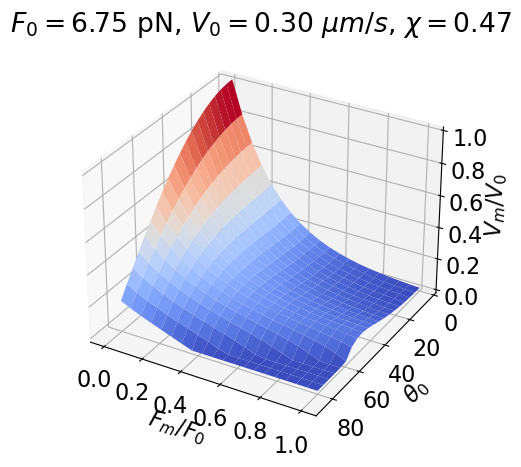

In [52]:
## 3D plot.

from matplotlib import cm
FF = np.linspace(0,1,20)
Theta0 = ((80/90)*np.pi/2)*np.linspace(0,1,20)
FF,Theta0 = np.meshgrid(FF,Theta0)

VV,eps =  FVnormFlex(FF,gamma=gamma,theta0=Theta0,chi=chi,useTan=useTan)

## Clip at zero
VV_clip = np.clip(VV,0,None)

# Plot the clipped surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(FF, Theta0*180/pi, VV_clip, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.set_xlabel('$F_m/F_0$')
ax.set_ylabel(r'$\theta_0$')
ax.set_zlabel(r'$V_m/V_0$')

plt.ylim(90,0)
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN, $V_0 = {V0*1e6:0.2f}~\mu m/s$, $\chi = {chi:0.2f}$')    
Savefig('surf_flex')


## Singular value of $F/F_0$

Saving Figs/F_crit_flex.pdf


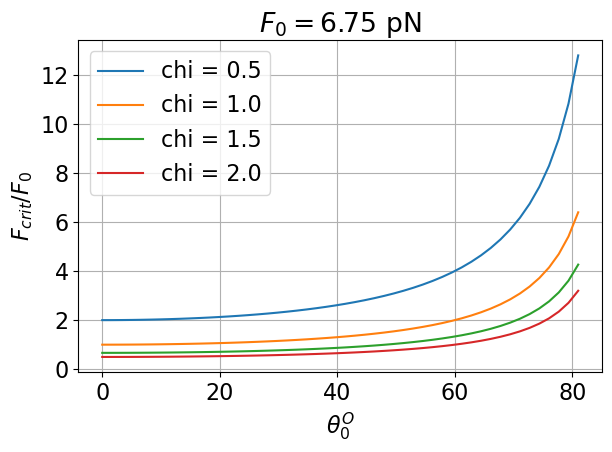

In [53]:
## Singular value of F/F0
CL = np.linspace(0.5,2,4) # Compliance
# CL = [2]
for ch in CL:
    Theta0 = (np.pi/2)*np.linspace(0,0.9)
    F_crit = 1/(ch*np.cos(Theta0))
    # print(F_crit)
    label = f'chi = {ch}'
    plt.plot((180/pi)*Theta0,F_crit,label=label)
    
plt.title(f'$F_0 = {F0*1e12:0.2f}$ pN')    
plt.xlabel('$\\theta_0^O$')
plt.ylabel('$F_{crit}/F_0$')
plt.grid()
# plt.ylim(0,90)
# plt.xlim(0,max(FFF))
plt.legend()
Savefig('F_crit_flex')

## Numerical values from MolOst96

$F_0 = 6.75$ pN, $L_0 = 43.62$ nm.
Saving Figs/F_crit.pdf


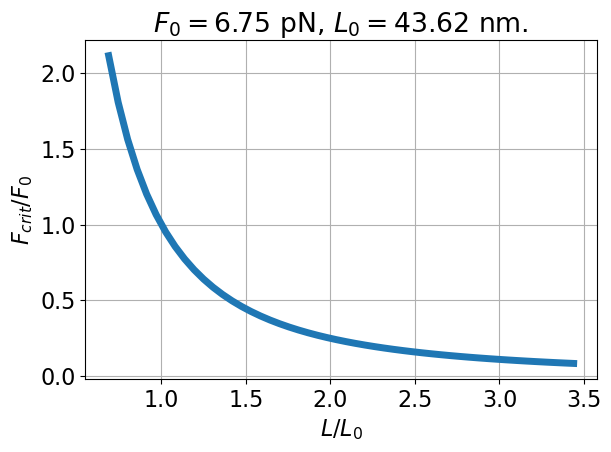

In [54]:
## Numerical values from MolOst96
# lamb = 1e-6
LL = np.linspace(30,150)*1e-9  # 30-150 nm
c = LL/(3*k_B*T*lamb)
c1 =  1/(3*k_B*T*lamb)
c = c1*LL

L0 = np.sqrt(1/(c1*F0))

## Corresponding values of chi
Chi = LL*LL*F0/(3*k_B*T*lamb)
F_crit = 1/Chi

title = f'$F_0 = {F0*1e12:0.2f}$ pN, $L_0 = {L0*1e9:0.2f}$ nm.'
plt.title(title) 
print(title)
plt.plot(LL/L0,F_crit,lw=lw)
plt.ylabel('$F_{crit}/F_0$ ')
plt.xlabel('$L/L_0$')
plt.grid()
Savefig('F_crit')


min chi: 0.47
Saving Figs/chi.pdf


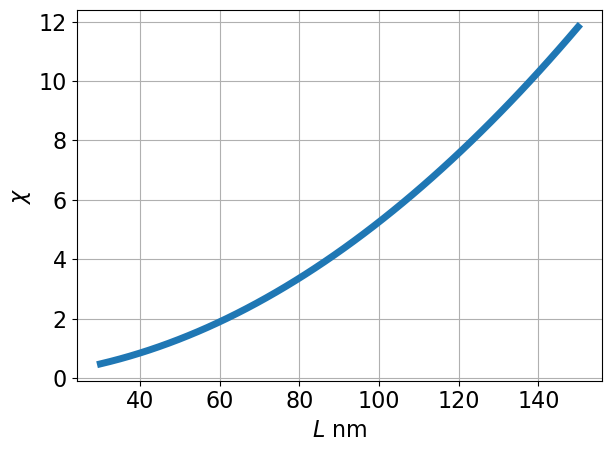

In [55]:
# Plot chi as well
chi_min = min(Chi)
print(f'min chi: {chi_min:0.2f}')
plt.plot(LL/1e-9,Chi,lw=lw)
plt.ylabel('$\\chi$ ')
plt.xlabel('$L$ nm')
plt.grid()
Savefig('chi')

# Experimental results from LiBieWei22
## Data from elife-73145-fig1-data1-v2.xlsx
### Velocity data

In [56]:
## Velocity data
dat = np.array(
    [
    [10,6.31,1.03],
    [26,5.69,0.85],
    [51,4.73,0.80],
    [102,3.40,0.74],
    [153,2.51,0.55],
    [255,1.75,0.42],
    [383,1.39,0.36],
    [510,0.97,0.32],
    [638,0.83,0.40],
    [765,0.64,0.33],
    [1020,0.42,0.14],
    [1276,0.29,0.10]
])

datT = dat.T
F_0_dat = datT[0]
V_dat = datT[1]
sd_dat = datT[2]

# F_dat = F_dat - min(F_dat)
# V_dat = V_dat - min(V_dat)

### Density data

In [57]:
## Density data
dens_dat = np.array(
[
[26,1.24,0.17],
[51,1.46,0.12],
[102,1.64,0.27],
[255,2.05,0.41],
[510,2.47,0.24],
[765,2.98,0.42],
[1020,3.31,0.52]
])

dens_datT = dens_dat.T
F_dens = dens_datT[0] 
D_dens = dens_datT[1] 

In [58]:
## Use cubic splines to interpolate density data

# splD = CubicSpline(F_dens,D_dens)
# D = splD(F_0_dat)

# plt.plot(F_0_dat,D)
# plt.plot(F_dens,D_dens)

## Interpolate density data

[-9.88159479e-07  2.98598981e-03  1.27748642e+00]


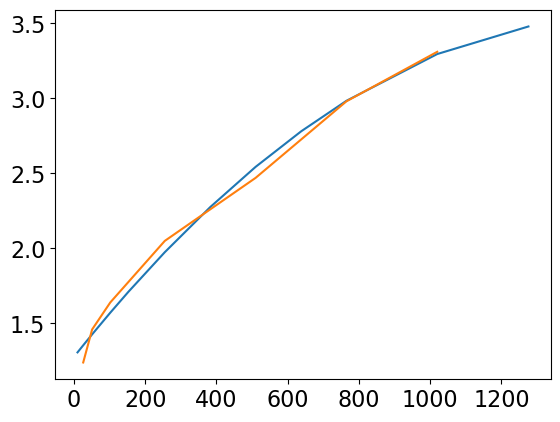

In [59]:
## Use polynomial to interpolate density data
deg = 2
coeff=np.polyfit(F_dens, D_dens, deg)
print(coeff)

D = np.polyval(coeff,F_0_dat)

plt.plot(F_0_dat,D)
plt.plot(F_dens,D_dens)

## Contact angle $\theta_0$

In [60]:
## Theta0
contactAngle = 54 # degrees - see LiBieWei p12. NB normal = 90deg
theta0 = (90-contactAngle)*pi/180
costh0 = np.cos(theta0)

## Normalise data + plot with initial parameters

[  7.64966083  19.19592468  35.73426247  64.89471984  89.41036318
 129.13623688 168.26523111 200.52522355 229.46969784 256.41257775
 309.54914502 366.80244001]
0.6283185307179586
Saving Figs/Experiment0.pdf


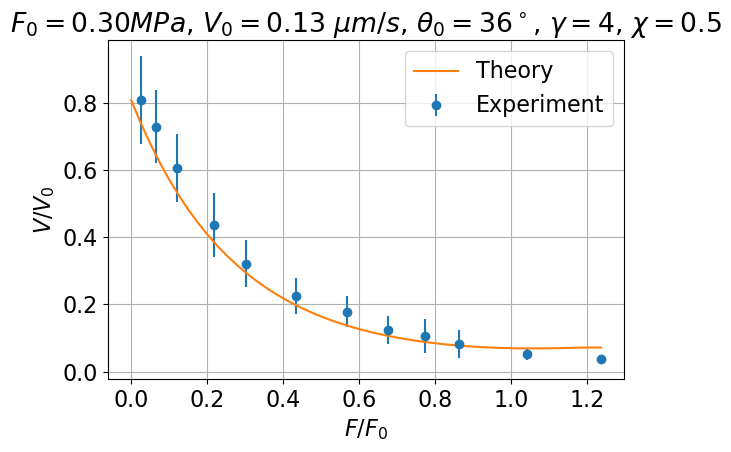

In [61]:
extrapolate = False
normalise = True
if normalise:
    F_dat = F_0_dat/D
    print(F_dat)
else:
    F_dat = F_0_dat

if extrapolate:
    F_dat_0 = F_max_est
    V_dat_0 = V_max_est
else:
    F_dat_0 = max(F_dat)
    V_dat_0 = max(V_dat)
    
F_th_est = F_dat_0
V_th_est = V_dat_0

F0_est = F_th_est*costh0
V0_est = V_th_est/costh0

chi_est = 0.5
gamma_est = 4


theta_est = theta0
print(theta0)
plt.errorbar(F_dat/F0_est,V_dat/V0_est,sd_dat/V0_est,fmt='o',label='Experiment')
FFm = np.linspace(0,max(F_dat/F0_est))

#VV = FVnorm(FF,gamma=gamma_est)
VVm,eps =  FVnormFlex(FFm,gamma=gamma_est,theta0=theta0,chi=chi_est)
plt.plot(FFm,VVm,label=f'Theory')
plt.grid()
plt.xlabel('$F/F_0$')
plt.ylabel('$V/V_0$')
plt.legend()
title = ''
title += f'$F_0 = {(F0_est/1e3):0.2f} MPa$'
title += f', $V_0={(V0_est/60):0.2f}~\mu m /s$'
title += f', $\\theta_0={(theta0*180/pi):0.0f}^\circ$'
title += f', $\gamma={gamma_est}$'
title += f', $\chi = {chi_est}$'
plt.title(title)
Savefig('Experiment0')


## Parameter estimation

In [69]:
EstimateChi = False

## Optimisation
from scipy.optimize import minimize

# ## Extend data (not used)
# F_dat_ext = np.append(np.append(0,F_dat),F_th_est)
# print(F_dat_ext)
# V_dat_ext = np.append(np.append(V_th_est,V_dat),0)
# print(V_dat_ext)

def fun(par):
    
    ## extract parameters
    gamma = par[0]
    if EstimateChi:
        chi = par[1]
    else:
        chi = chi_est
    
    # F0 = F_th_est
    # V0 = V_th_est
    
    FFm = F_dat/F0_est
    VVm,eps =  FVnormFlex(FFm,gamma=gamma,theta0=theta0,chi=chi)
    err = VVm-V_dat/V0_est
    
    return np.linalg.norm(err)

## Initialise parameter vector
for EstimateChi in [False,True]:
    print('\n===== EstimateChi:', EstimateChi)
    if EstimateChi:
        par0 = np.zeros(2)
        par0[0] = gamma_est
        par0[1] = chi_est
    else:
        par0 = np.zeros(1)
        par0[0] = gamma_est
        chi_est = 0
    
    ## Minimise
    tol = 1e-6
    par = minimize(fun, par0,tol=tol)
    
    print(par)
    ## extract parameters.
    gamma_est = par.x[0]
    if EstimateChi:
        gamma_est_chi = gamma_est
        chi_est = par.x[1]
    else:
        gamma_est_0 = gamma_est
        
    
    print(f'gamma_est = {gamma_est:0.2f}')
    print(f'chi_est = {chi_est:0.2f}')
    print(f'theta_est = {(theta_est*180/pi):0.2f}')



===== EstimateChi: False
      fun: 0.10516781487712225
 hess_inv: array([[3.55454158]])
      jac: array([4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([3.06942874])
gamma_est = 3.07
chi_est = 0.00
theta_est = 36.00

===== EstimateChi: True
      fun: 0.09147784022505913
 hess_inv: array([[3.52158893, 0.73639783],
       [0.73639783, 1.2235172 ]])
      jac: array([ 7.45058060e-09, -5.12227416e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([3.14814021, 0.29005617])
gamma_est = 3.15
chi_est = 0.29
theta_est = 36.00


Saving Figs/Experiment.pdf


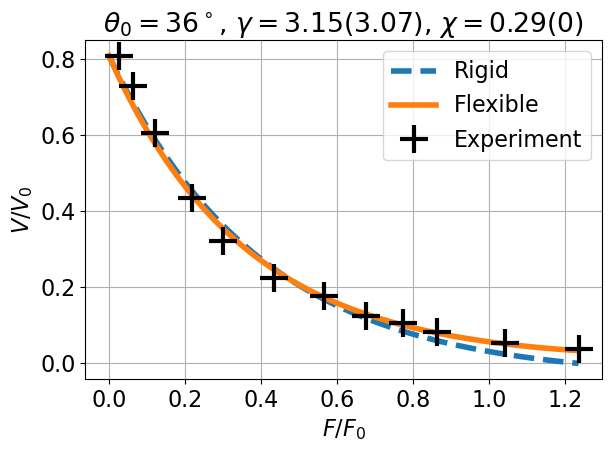

In [78]:
## Plot
FF_max = max(F_dat/F0_est)
FF = np.linspace(0,FF_max)

## Rigid result
VV,eps =  FVnormFlex(FF,gamma=gamma_est_0,theta0=theta0,chi=0)
plt.plot(FF,VV,lw=4,label=f'Rigid', ls='dashed')

## Flexible result
VV,eps =  FVnormFlex(FF,gamma=gamma_est_chi,theta0=theta0,chi=chi_est)
plt.plot(FF,VV,lw=4,label=f'Flexible')

plt.plot(F_dat/F0_est,V_dat/V0_est,'+',markersize=20,markeredgewidth=3,color='black',label='Experiment')
plt.grid()
plt.xlabel('$F/F_0$')
plt.ylabel('$V/V_0$')
plt.legend()
title = ''
title += f'$\\theta_0={(theta0*180/pi):0.0f}^\circ$'
title += f', $\gamma={gamma_est_chi:0.2f}({gamma_est_0:0.2f})$'
title += f', $\chi = {chi_est:0.2f}(0)$'
plt.title(title)
Savefig('Experiment')
